In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
####
# Going through the code from Hands-On Machine Learning with SciKit-Learn and Tensor Flow
# Aurelien Geron
#https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

### Import the data from github link

In [3]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") # file path
    if not tarball_path.is_file(): # is_file(): bool - Tells whether the given file is a regular file.
        # if the file is not found...
        Path("datasets").mkdir(parents=True, exist_ok=True)
        #If parents is true, any missing parents of this path are created as needed; they are created with the default permissions without taking mode into account
        url = "https://github.com/ageron/data/raw/main/housing.tgz" # url with the original datafile
        urllib.request.urlretrieve(url, tarball_path) # grab the datafile from url
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv")) #returns a csv of the data

# run the function above
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


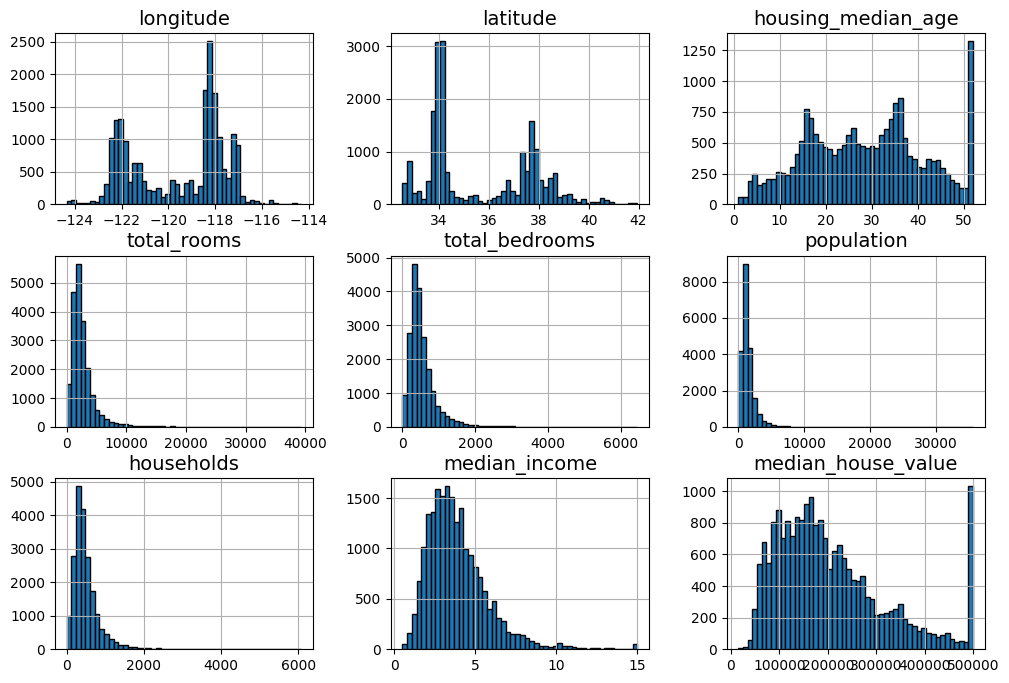

In [7]:
# Define the font and label sizes on the graph
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# makes a histogram with 50 bins
housing.hist(bins=50, figsize=(12, 8), edgecolor='black', linewidth=1.)
plt.show()

### Split the Dataset

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.2)
print("Training dataset: ",len(train))
print("Testing dataset: ",len(test))

Training dataset:  16512
Testing dataset:  4128


In [9]:
housing_train = train.copy()
housing_text = test.copy()

### Some Data Visualizations

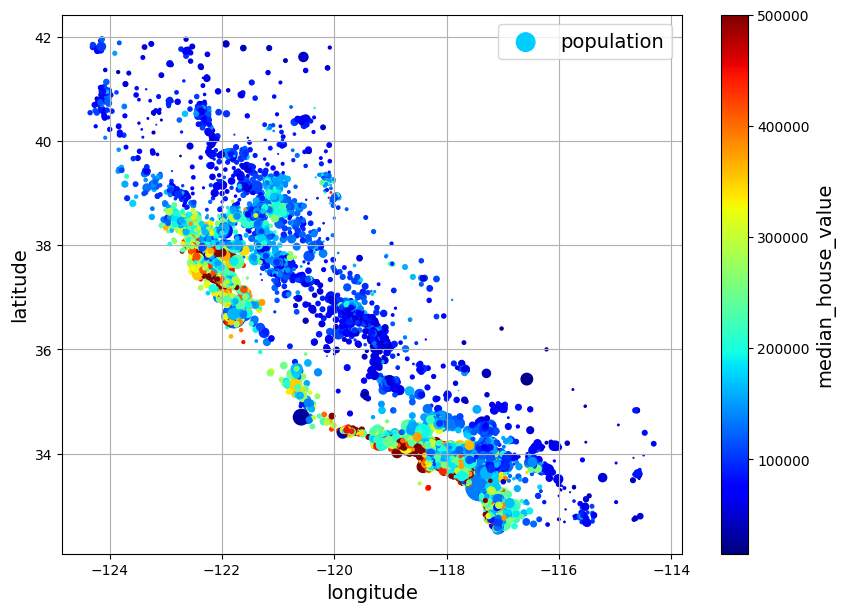

In [11]:
housing_train.plot(kind="scatter", 
             x="longitude", 
             y="latitude",
             grid=True,
             s=housing_train["population"] / 100, # this defines the marker size
             label="population",
             c="median_house_value",  # list of colors
             cmap="jet", # specifies the type of color map
             colorbar=True, # adds the color bar on the right
             legend=True, 
             figsize=(10, 7))

plt.show()


In [13]:
# dataframe.corr() is used to find the pairwise correlation of all columns
corr_matrix = housing_train.corr(numeric_only = True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689760
total_rooms           0.139131
housing_median_age    0.107200
households            0.068726
total_bedrooms        0.052559
population           -0.021975
longitude            -0.047251
latitude             -0.143755
Name: median_house_value, dtype: float64

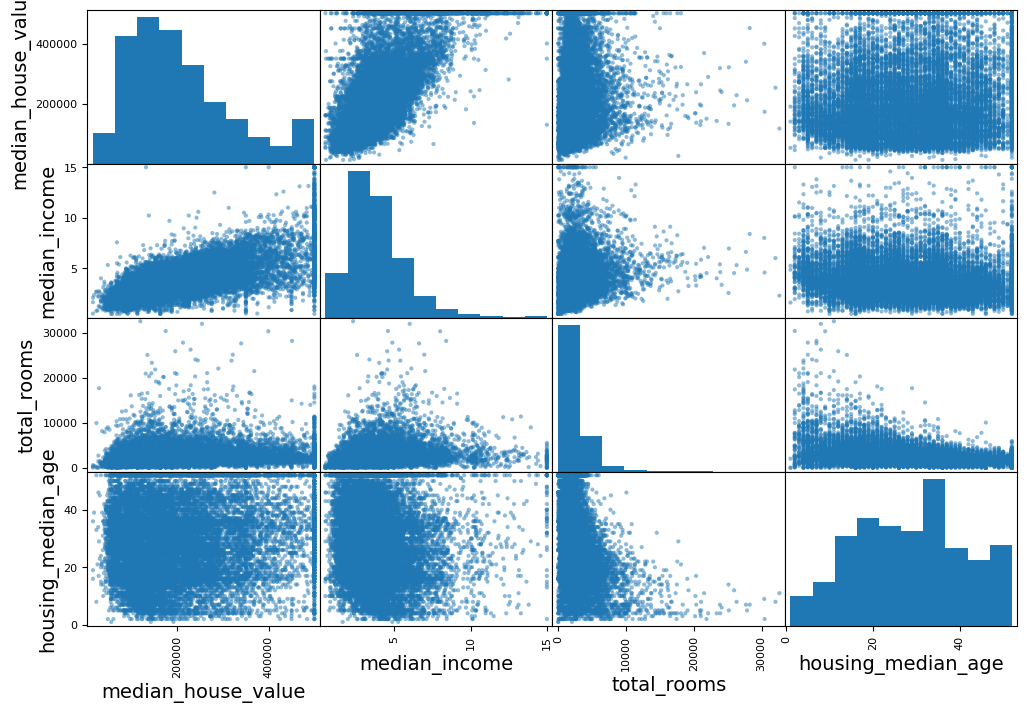

In [12]:
from pandas.plotting import scatter_matrix

# Plots the correlation matrix !!

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train[attributes], figsize=(12, 8))

plt.show()

### Test some Attributes

In [14]:
housing_train["rooms_per_house"] = housing_train["total_rooms"] / housing_train["households"]
housing_train["bedrooms_ratio"] = housing_train["total_bedrooms"] / housing_train["total_rooms"]
housing_train["people_per_house"] = housing_train["population"] / housing_train["households"]

# For these, perhaps the amount of rooms per house can help determine the cost of housing
# perhaps the total bedrooms per the house, or the number of people per house...

In [15]:
corr_matrix = housing_train.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689760
rooms_per_house       0.147438
total_rooms           0.139131
housing_median_age    0.107200
households            0.068726
total_bedrooms        0.052559
population           -0.021975
people_per_house     -0.022647
longitude            -0.047251
latitude             -0.143755
bedrooms_ratio       -0.255231
Name: median_house_value, dtype: float64

### Data Cleaning

In [18]:
# Check for nas
null_rows_idx = housing_train.isnull().any(axis=1)
housing_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


In [17]:
# drop na values...
housing_train.dropna(subset=["total_bedrooms"])

# could use an imputer to transform any blank spaces with median or mean values...

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy="median")
#housing_num = housing.select_dtypes(include=[np.number])
#imputer.fit(housing_num)
#X = imputer.transform(housing_num)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
7208,-117.87,33.72,37.0,2216.0,497.0,2445.0,506.0,3.8421,174000.0,<1H OCEAN,4.379447,0.224278,4.832016
3473,-120.55,41.61,22.0,9047.0,1831.0,4276.0,1622.0,2.0802,47900.0,INLAND,5.577682,0.202388,2.636252
12357,-118.21,33.88,31.0,1332.0,417.0,1405.0,363.0,2.0125,143000.0,<1H OCEAN,3.669421,0.313063,3.870523
17563,-122.10,37.38,37.0,4167.0,612.0,1577.0,597.0,7.5655,500001.0,NEAR BAY,6.979899,0.146868,2.641541
12986,-121.01,37.68,33.0,828.0,123.0,373.0,133.0,5.5000,146200.0,INLAND,6.225564,0.148551,2.804511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16539,-121.03,37.67,24.0,2162.0,459.0,1468.0,441.0,3.1857,98300.0,INLAND,4.902494,0.212303,3.328798
17391,-118.32,33.91,35.0,881.0,159.0,605.0,170.0,3.6654,184500.0,<1H OCEAN,5.182353,0.180477,3.558824
1281,-118.60,34.08,40.0,866.0,181.0,399.0,176.0,6.9100,380000.0,<1H OCEAN,4.920455,0.209007,2.267045
13539,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,INLAND,62.422222,0.226059,1.844444


In [24]:
# Outliers....
from sklearn.ensemble import IsolationForest
# Return the anomaly score of each sample using the IsolationForest algorithm

# In order to do the isolation forest, need a df of just numerical values!
num_housing = housing_train.drop(columns = ["ocean_proximity"]).dropna()

isolation_forest = IsolationForest() 
outlier_pred = isolation_forest.fit_predict(num_housing)

In [25]:
outlier_pred

array([ 1, -1,  1, ...,  1, -1,  1])